In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2023-04-17 21:19:28.321434: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 21:19:32.167491: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 21:19:32.177356: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 21:19:50.237599: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#load data
data = keras.datasets.fashion_mnist

In [3]:
from tensorflow.python import train
# split the data for testing and training
(train_images, train_labels), (test_images, test_labels) = data.load_data()

# a list of what our labels will represent
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# shrink the images
train_images = train_images/255.0
test_images = test_images/255.0


4422102/4422102 [==============================] - 6s 1us/step


In [7]:
from keras.api._v2.keras import activations
# define the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# setup model parameters
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Epoch 1/10


2023-04-17 21:25:51.532214: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.5020 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3775 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3388 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3157 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2981 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2855 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2727 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2607 - accuracy: 0.9022
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2526 - accuracy: 0.9054
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


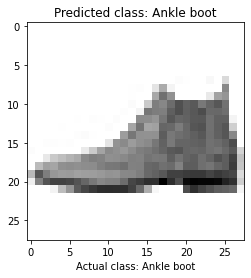

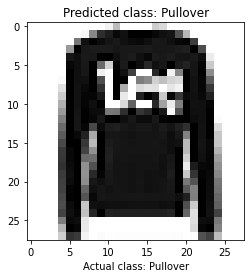

In [8]:
# train the model
model.fit(train_images, train_labels, epochs= 10)

# making predictions
prediction = model.predict(test_images)

# validate the results
for i in range(2):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel("Actual class: " + label_names[test_labels[i]])
  plt.title("Predicted class: " + label_names[np.argmax(prediction[i])])
  plt.show()